In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
print(df)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


# Applying UCB

In [3]:
import math
d = 10 # number of ads
N = 10000  # number of rounds
number_of_selection = [0] * d # this list will accumulate the number of times each ad is selected
sum_of_rewards = [0]*d # this list will collect the rewards of each ad individually
total_rewards = 0 # this variable will accumulate the total rewards of all the ads
ads_selected = [] # will collect all the ads selected per round
for n in range(0,N): # this loop williterate through the rounds
    ad = 0 # this variable will represent the current ad
    max_upper_bound = 0
    for i in range(0,d):
        if(number_of_selection[i]>0):
            average_reward = sum_of_rewards[i]/number_of_selection[i]
            delta_i = math.sqrt((3/2)*math.log(n)/number_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # creating the first confidence bound with the value 1*10^400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad) # we are accumulating the selected ad
    number_of_selection[ad] += 1 # increasing number of selection for the selected ad
    reward = df.values[n,ad] # collecting the reward of the selected ad from the dataset
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward # increasing the reward of individual selected ad
    total_rewards = total_rewards + reward # collecting all the reward

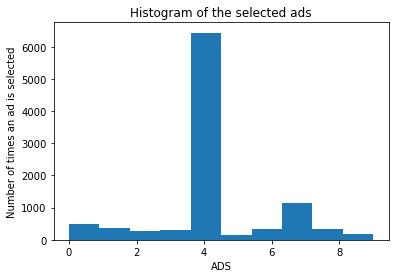

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of the selected ads')
plt.xlabel('ADS')
plt.ylabel('Number of times an ad is selected')
plt.show()